In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.ticker as ticker
import pandas as pd
import scipy as sp
import scipy.interpolate
import matplotlib.gridspec as gridspec
from scipy.fftpack import fft, ifft, fftshift
from statistics import mean

In [ ]:
!wget -O sleep.csv "https://www.dropbox.com/s/x530r27osz61fn0/sleep.dat"
!wget -O math.csv "https://www.dropbox.com/s/8brugnnrb0bqhn2/math.dat"
!wget -O code.csv "https://www.dropbox.com/s/8knxanywbugmiaz/code.dat"
!wget -O game.csv "https://www.dropbox.com/s/j8215q8cjra1e9a/game.dat"

--2022-05-08 19:13:21--  https://www.dropbox.com/s/x530r27osz61fn0/sleep.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/x530r27osz61fn0/sleep.dat [following]
--2022-05-08 19:13:22--  https://www.dropbox.com/s/raw/x530r27osz61fn0/sleep.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d0f5672f3875fcc7b89633838.dl.dropboxusercontent.com/cd/0/inline/Bk66dl3656T9F_-elRAPFX-OXe8WwY5ectGg6IhjmujYF8CUYQ3h_YAjNkUAuQPb_-Kk7Zo-ih2TIqxxmDU9ncyQpJleZiCXVPu3Js6w1RIqr-GJwTPNnKeWuwpd_8gVUHNrEzRxcZCP18zuvYokNwNuq4J14nB5U_VlDfoQIClpbw/file# [following]
--2022-05-08 19:13:22--  https://uc3d0f5672f3875fcc7b89633838.dl.dropboxusercontent.com/cd/0/inline/Bk66dl3656T9F_-elRAPFX-OXe8WwY5ectGg6IhjmujYF8CUYQ3h_YAjNkUAuQPb_-Kk7Zo-ih2TI

In [ ]:
df_sleep = pd.read_csv("sleep.csv", sep="\t", header = None, names=["Time", "Volt"])
df_math = pd.read_csv("math.csv", sep="\t", header = None, names=["Time", "Volt"])
df_code = pd.read_csv("code.csv", sep="\t", header = None, names=["Time", "Volt"])
df_game = pd.read_csv("game.csv", sep="\t", header = None, names=["Time", "Volt"])

In [ ]:
def alpha(data):
  data.drop_duplicates()
  x = data['Time'].values.tolist()
  y = data['Volt'].values.tolist()
  N = 256
  # Create input signal 

  # Find Forward FFT
  X = fft(y, N)

  # Set the list - number of harmonics
  l_freqs = (8,9,10,11,12,13)

  # Plot signal with several
  plt.figure(figsize=(16, 4), dpi=120)
  plt.title('Input signal', fontsize=16)
  plt.xlabel('Samples', fontsize=14)
  plt.ylabel('Amplitude', fontsize=14)
  plt.xlim([0, N-1])
  plt.xticks(np.linspace(0, N, 9, endpoint=True))
  for i, j in enumerate(l_freqs): 
      K = X.copy()
      K[j:] = 0
      k = np.real(ifft(K))
      plt.plot(k, color='C'+str(i), linewidth=1.75, label='N freq = {}'.format(l_freqs[i]))
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.savefig("fig2_gibbs.png")

In [ ]:
def beta(data):
  data.drop_duplicates()
  x = data['Time'].values.tolist()
  y = data['Volt'].values.tolist()
  N = 256
  # Create input signal 

  # Find Forward FFT
  X = fft(y, N)

  # Set the list - number of harmonics
  l_freqs = (13,14,15,16,17,18,19,20,21,22,23,24,25)

  # Plot signal with several
  plt.figure(figsize=(16, 4), dpi=120)
  plt.title('Input signal', fontsize=16)
  plt.xlabel('Samples', fontsize=14)
  plt.ylabel('Amplitude', fontsize=14)
  plt.xlim([0, N-1])
  plt.xticks(np.linspace(0, N, 9, endpoint=True))
  for i, j in enumerate(l_freqs): 
      K = X.copy()
      K[j:] = 0
      k = np.real(ifft(K))
      plt.plot(k, color='C'+str(i), linewidth=1.75, label='N freq = {}'.format(l_freqs[i]))
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.savefig("fig2_gibbs.png")

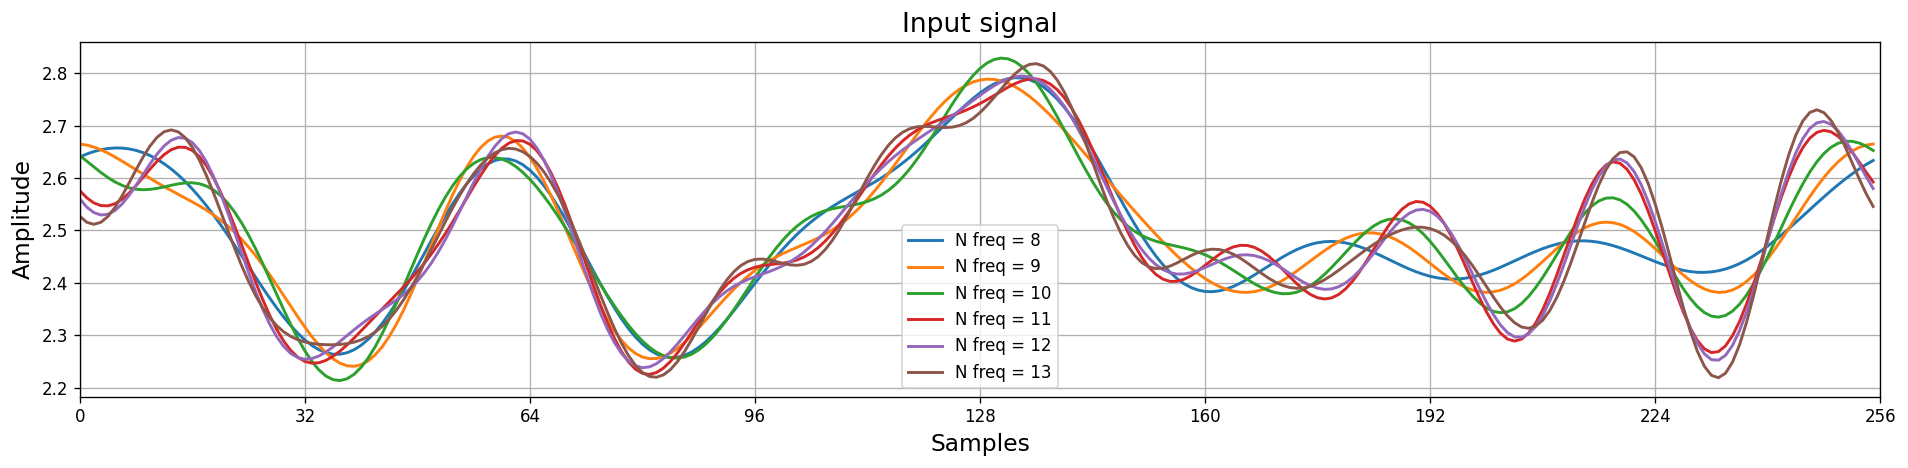

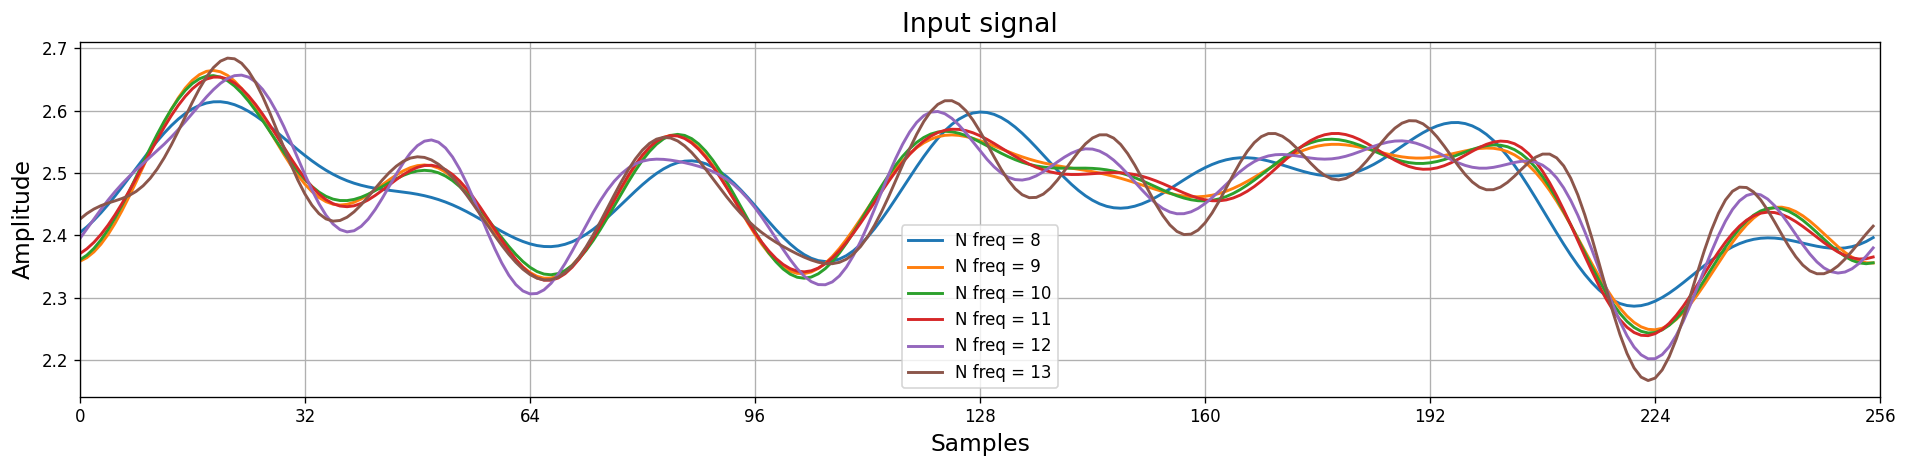

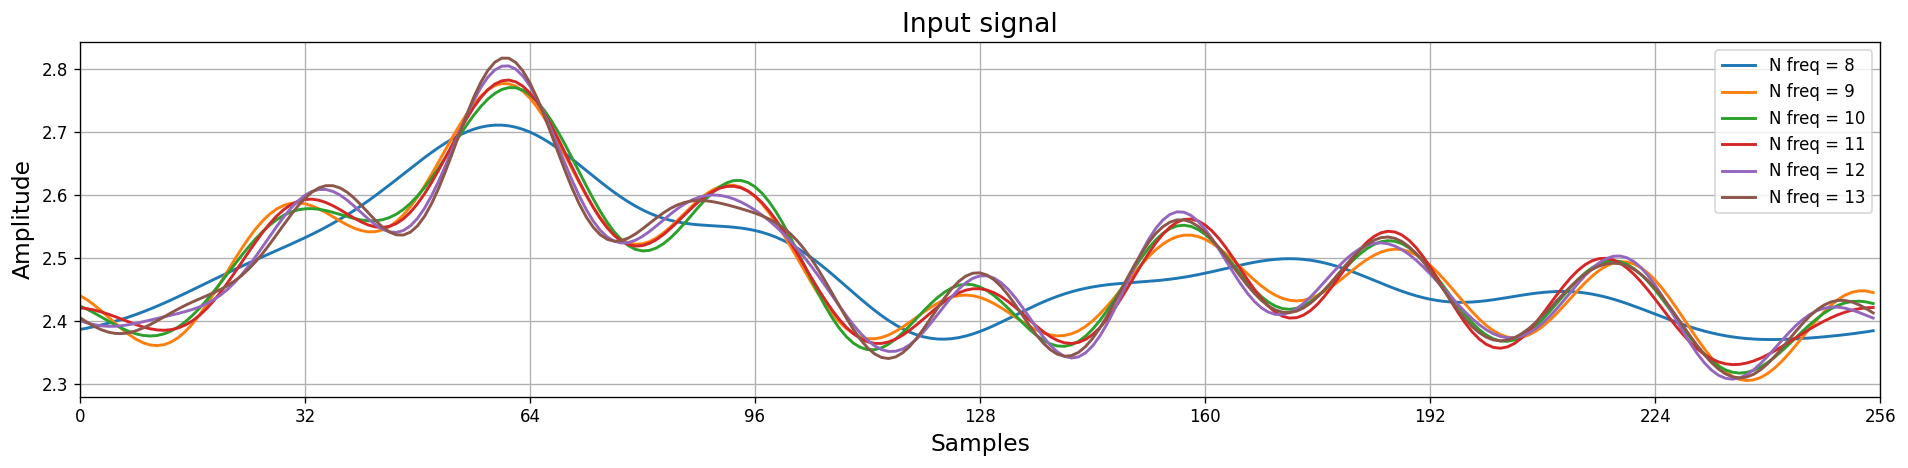

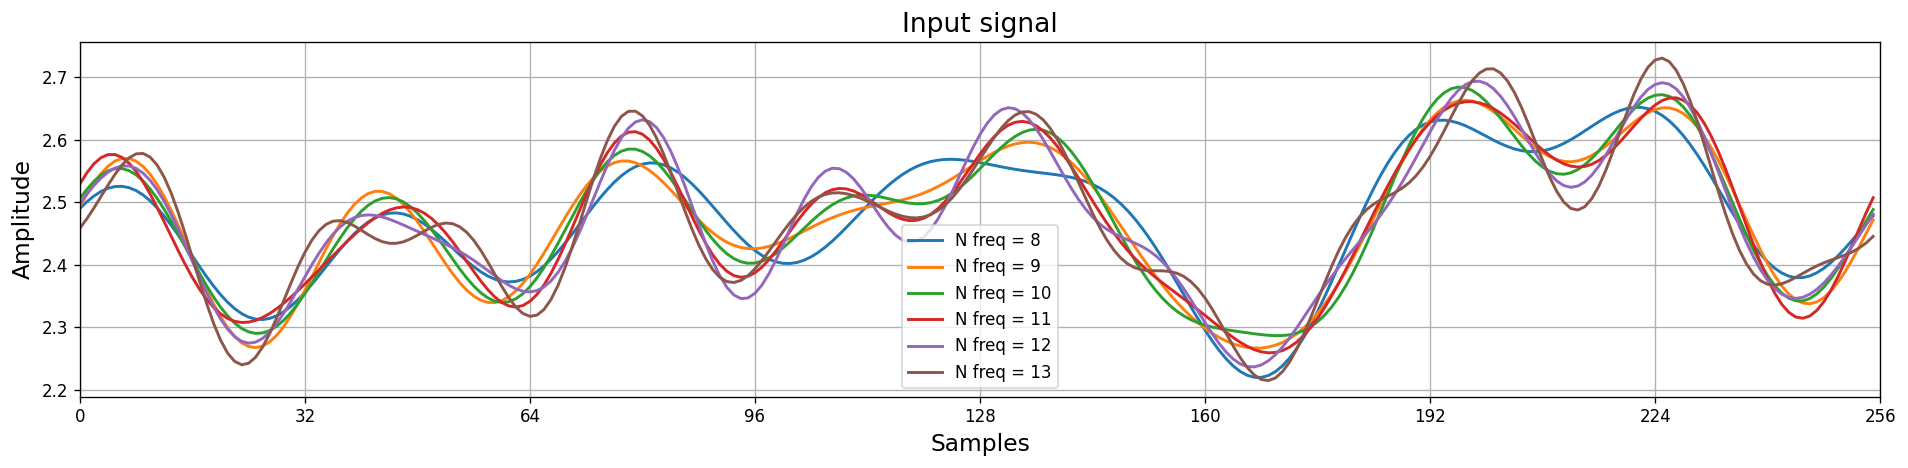

In [ ]:
alpha(df_sleep)
alpha(df_math)
alpha(df_code)
alpha(df_game)

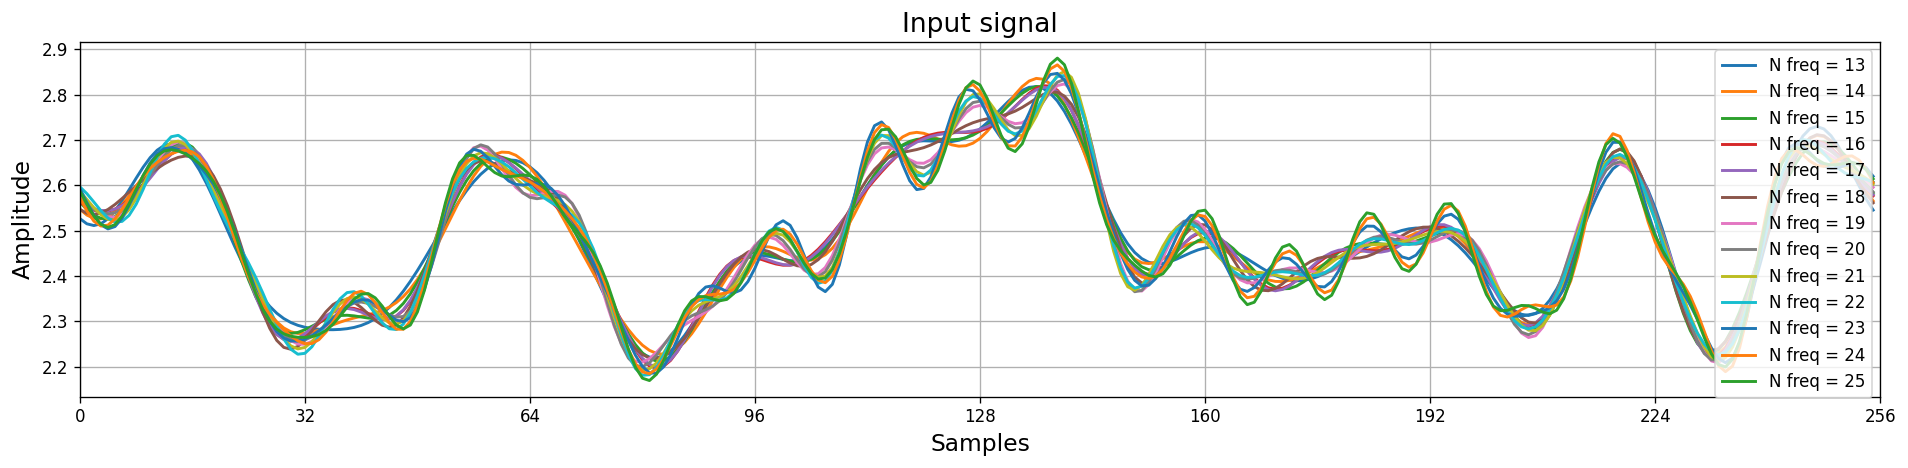

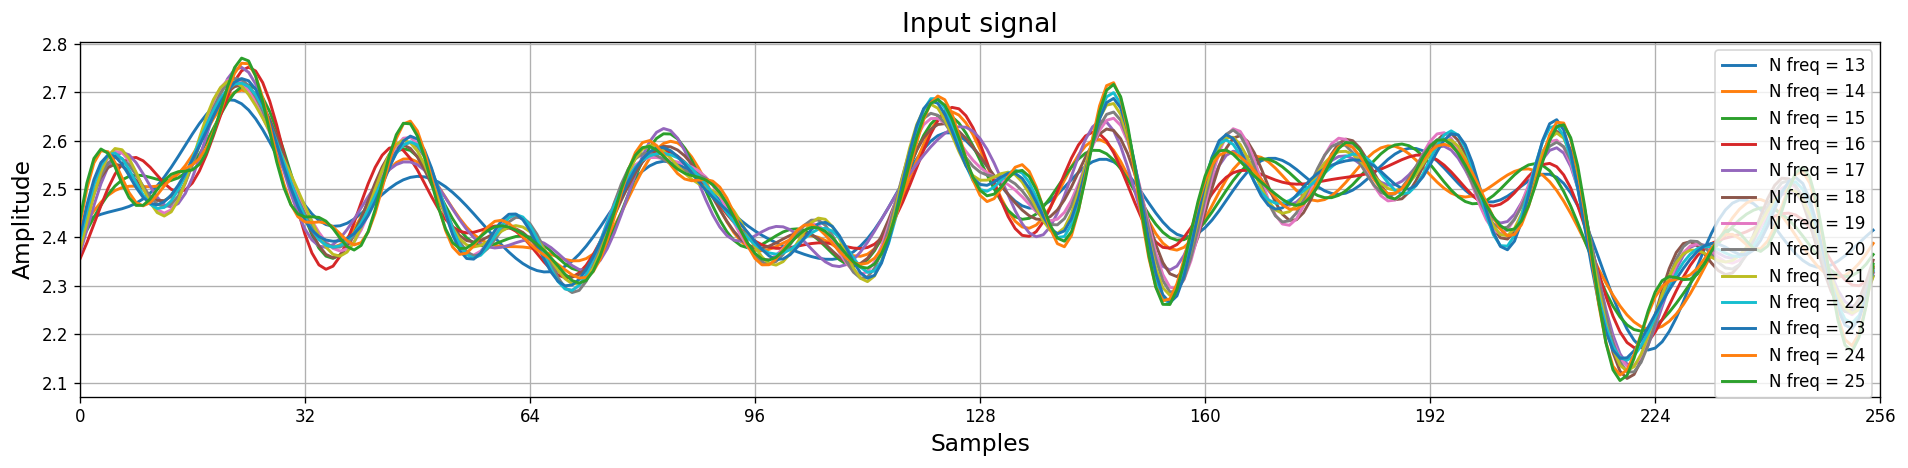

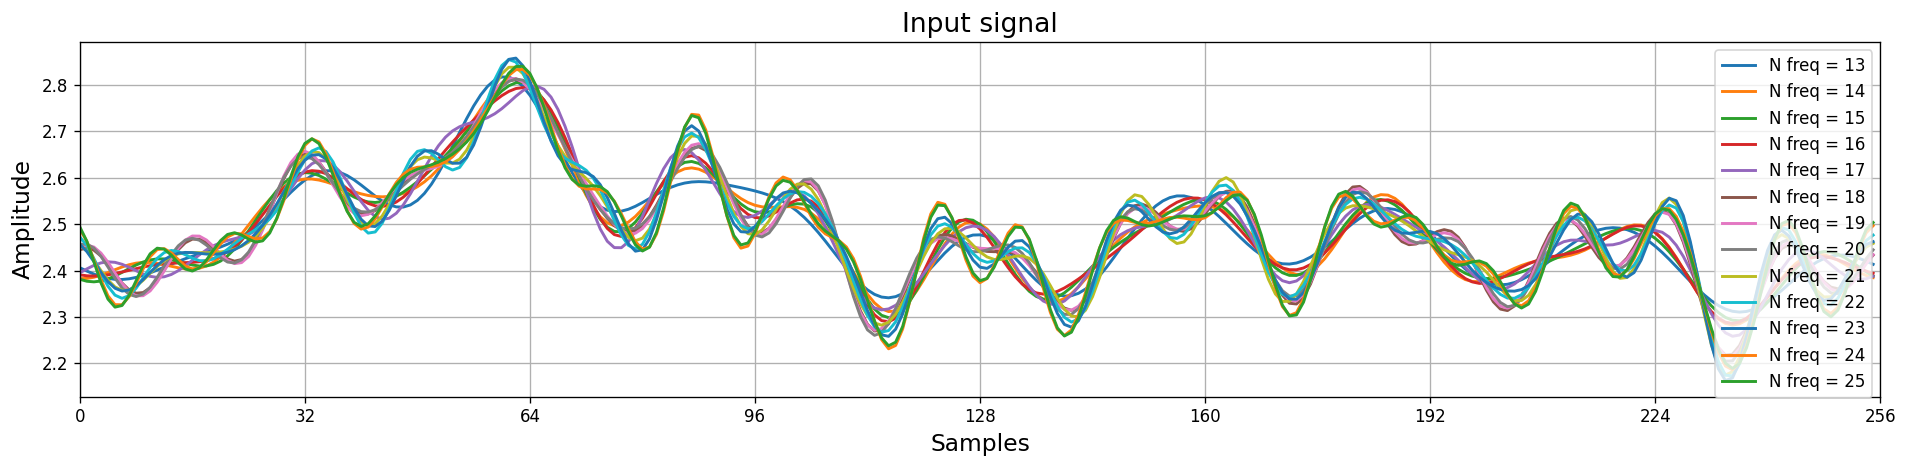

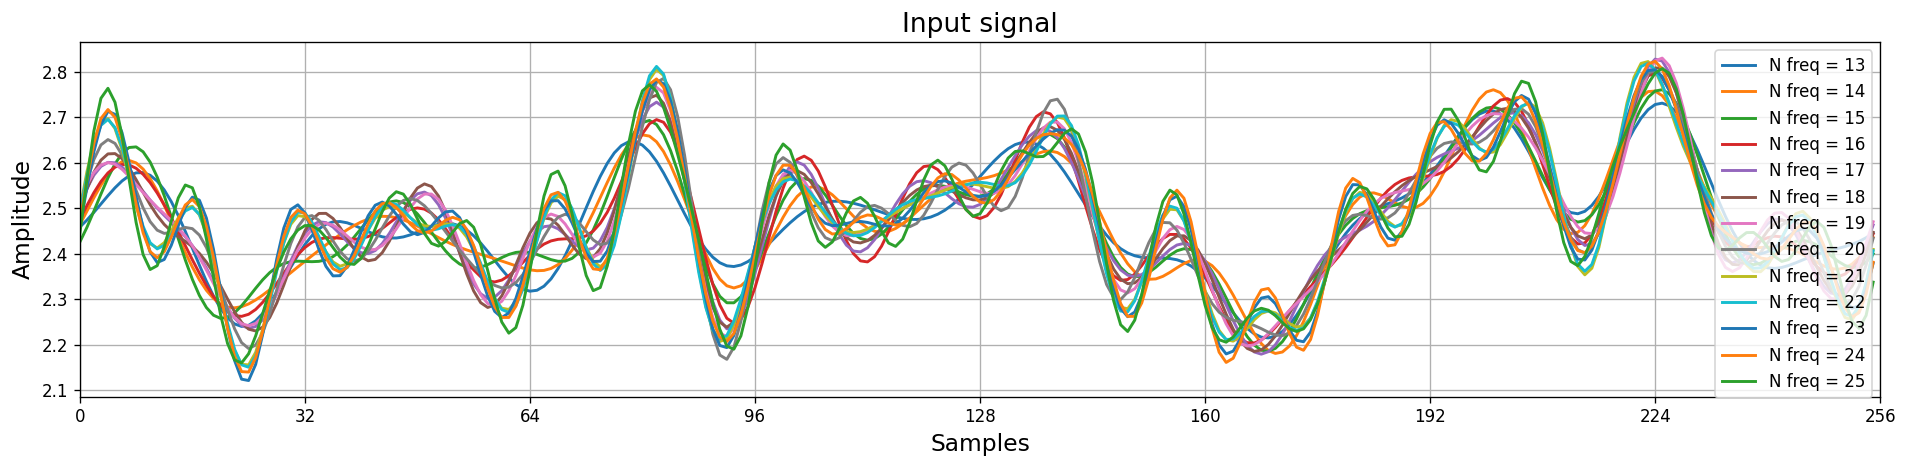

In [ ]:
beta(df_sleep)
beta(df_math)
beta(df_code)
beta(df_game)

**Выводы**
Как мы видим, частота бета ритмов выше при повышенной мозговой активности, нежели в пассивном бодрствовании 